# ⭐AIFFEL 대전 1기 Exploration 7. 나랑 닮은 연예인을 찾아보자⭐
>  프로젝트 소개: 내가 가진 인물 사진을 입력하면 데이터셋 중에서 가장 유사한 사진을 출력하는 프로젝트

***

# 🎯 프로젝트 목표
   * ## 얼굴 사진의 얼굴 영역을 인식하고 임베딩 벡터로 변환
   * ## 임베딩 벡터로 변환 후 사진끼리 거리 비교
   * ## 비교한 거리를 바탕으로 내 사진과 연예인 사진 중 가장 비슷한 사진 출력

***

# ✅프로젝트 순서
## 1. 사진 모으기
- 1-1. 내 사진 찍기  
      1-1-2 내 사진으로 얼굴 영역 인식해보기  
      1-1-2 내 사진으로 얼굴 영역 인식해보기
- 1-2. 비교할 연예인 사진 모으기  
      1-2-1. 연예인 사진 하나 확인  
      1-2-2. 연예인 사진으로 얼굴 영역 인식해보기

## 2. 얼굴 영역 자르기
- 2-1. 얼굴 영역 자르는 함수 작성  
      2-1-1. 함수 작동 확인(내 사진)  
      2-1-2. 함수 작동 확인(연예인 사진)

## 3. 얼굴 영역의 임베딩 추출하기
- 3-1. 중요 개념 및 용어 정리  
- 3-2. 얼굴 임베딩 벡터 구하는 함수  
      3-2-1. 이미지 하나에 대한 얼굴 임베딩 벡터 구하는 함수  
      3-2-2. 폴더 내부에 있는 이미지 전체에 대한 얼굴 임베딩 벡터 구하는 함수

- 3-3. 얼굴 임베딩 사이의 거리 측정  
      3-3-1. 내 사진 2장과 연예인 사진 1장  
      3-3-2. 얼굴 영역 인식 및 임베딩 벡터 추출  
      3-3-3. list -> arrray 변경  
      3-3-4. 임베딩 벡터 간의 L2 거리측정  
      3-3-5. 파일명으로 임베딩 벡터 거리 측정 함수 작성

## 4. 얼굴 임베딩 공간의 시각화
- 4-1. 차원 축소

## 5. 가장 가까운 얼굴 찾아보기
- 5-1. 내 사진 하나를 기준으로 잡고 내 사진과 연예인들 사진과 임베딩 벡터 거리 차이를 기준으로 정렬
- 5-2. 입력한 사진과 가장 비슷한 사람 출력하는 함수

## 6. 시각화 해보기
- 닮은꼴 연예인 1등부터 5등까지 시각화(얼굴 부분만 확인해보기)

## 7. 루브릭 평가 및 회고
- 7-1. 루브릭 평가
- 7-2. 회고

***

In [1]:
import os
import numpy as np
from IPython.display import Image
import face_recognition
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

## 1. 사진 모으기

In [2]:
# 사진이 있는 경로
image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/image'

* ## 1-1. 내 사진 찍기

* ### 1-1-1 내 사진 확인

경로는:  /home/aiffel-dj40/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/test/img_cw4.jpg


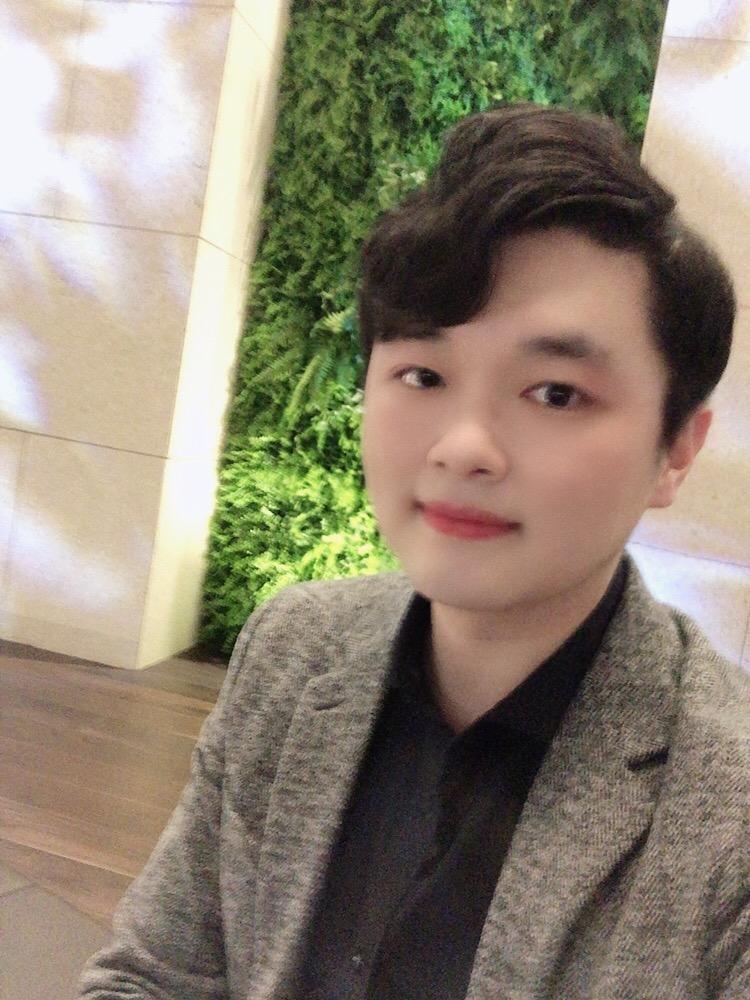

In [3]:
# 내 사진 하나 출력해보기
my_image_test_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/test/img_cw4.jpg'
print('경로는: ', my_image_test_path)
Image(my_image_test_path) # 내 사진 확인

* ### 1-1-2 내 사진으로 얼굴 영역 인식해보기

얼굴 영역의 좌표: [(320, 617, 587, 349)]


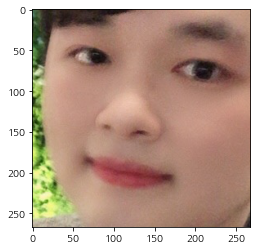

In [4]:
image = face_recognition.load_image_file(my_image_test_path)
face_locations = face_recognition.face_locations(image)

print('얼굴 영역의 좌표:', face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

* ## 1-2. 비교할 연예인 사진 모으기

* ### 1-2-1 연예인 사진 하나 확인

경로는:  /home/aiffel-dj40/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/test/김유정.jpg


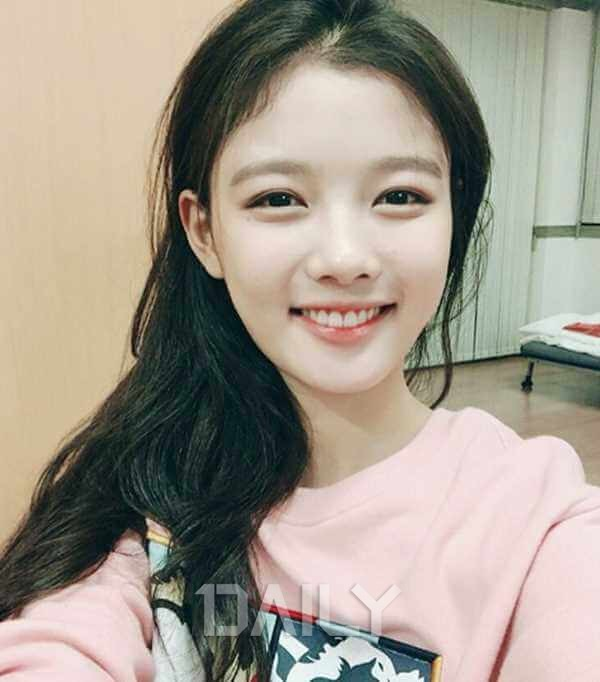

In [5]:
# 연예인 사진 하나 출력해보기
celebrity_image_test_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/test/김유정.jpg'
print('경로는: ', celebrity_image_test_path)
Image(celebrity_image_test_path) # 연예인 이미지 확인 (BTS의 RM)

* ### 1-2-2 연예인 사진으로 얼굴 영역 인식해보기

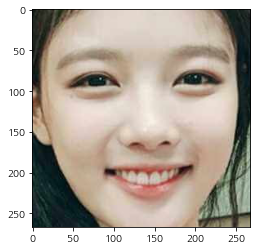

In [6]:
image = face_recognition.load_image_file(celebrity_image_test_path)
face_locations = face_recognition.face_locations(image)
a, b, c, d = face_locations[0]
a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## **❗ 1번 사진 모으기 결과: 로컬에 있는 이미지 확인, 얼굴 인식도 모두 (내 사진, 연예인 사진) <span style="color:blue">잘 된다.</span>**

***

## 2. 얼굴 영역 자르기

* ## 2-1. 얼굴 영역 자르는 함수 작성
 * ### 사용한 라이브러리
    1. face_recognition의 load_image_file
    2. face_recognition의 face_locations

In [7]:
# 얼굴 영역 자르는 함수

def get_gropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

* ### 2-1-1. 함수 작동 확인 (내 사진)

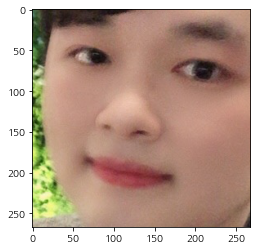

In [8]:
# 1에서 정의한 my_image_test_path 경로 사용
cropped_face = get_gropped_face(my_image_test_path)
plt.imshow(cropped_face)

* ### 2-1-2. 함수 작동 확인 (연예인 사진)

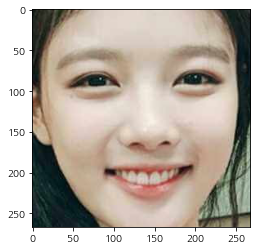

In [9]:
# 1에서 정의한 celebrity_image_test_path 경로 사용
cropped_face = get_gropped_face(celebrity_image_test_path)
plt.imshow(cropped_face)

## **❗ 2번 얼굴 영역 함수 결과: 얼굴 영역만 <span style="color:blue">잘 나오는</span> 함수 작성 완료**

***

## 3. 얼굴 영역의 임베딩 추출하기

* ## 3-1. 중요 개념 및 용어 정리

* **임베딩이란?**

  \- 컴퓨터에게 데이터를 입력할 때는 어떤 벡터 공간에 데이터의 정보를 사상(mapping)하는 방법을 사용하는데, 이때 고차원의 정보를 저차원으로 변환해 필요한 정보를 보존하는 것
  
  
* **왜 고차원 -> 저차원?**

  \- 만약 어떤 고차원 이미지의 벡터 정보를 한 칸만 우측으로 옮기면 사람은 미미한 변화로 인식하지만 컴퓨터는 매우 큰 차이로 인식한다. 이는 현실과 다르기 때문에 저차원으로 변환해 작은 변화는 작게 인식할 수 있도록 하기 위함.
  
  
* **얼굴 임베딩은 어떻게 만들까?**

  \- 여기서는 FaceNet을 사용하고 있다.
  
  
* **FaceNet이란?**

  \- 2015년 구글에서 발표
    
  \- 네트워크 뒤에 L2 정규화를 거쳐 임베딩을 만들고 여기에 Triplet Loss를 사용. (아래 그림 참고)
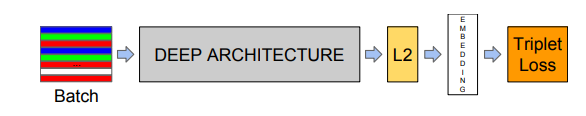
  
* **L2 정규화란?**

  \- (결과물 / 모델 결과물의 L2 거리) --> 정규화
  
  \- L2 정규화를 거친 임베딩 벡터는 벡터의 크기가 1로 맞춰짐. 만약 128차원의 공간상에 반지름이 1인 구가 있다면 구의 표면상의 한 점을 가리키는 벡터처럼 분포
  
  **- 즉, 두 점 사이의 거리를 비교할 때 두 벡터의 절대적 크기가 아닌 <span style="color:red">두 벡터 사이의 각도</span>에만 영향을 받게 된다.**
  
  
* **Triplet Loss란?**
  
  **- <U>세 개의 데이터 쌍을 이용해 계산하는 손실함수로 네트워크를 학습시킬 수 있다.</U>**
  
  \- 예시: 이미지 3장(A1, A2, B1)이 있고 A1, A2는 동일 인물의 다른 사진이고 B1은 다른 사람의 사진이다.
  
        Triplet Loss는 학습을 통해 A1과 A2는 임베딩 벡터간의 거리를 가깝게, A1과 B1는 임베딩 벡터간의 거리를 멀게 학습을 하게 해준다.
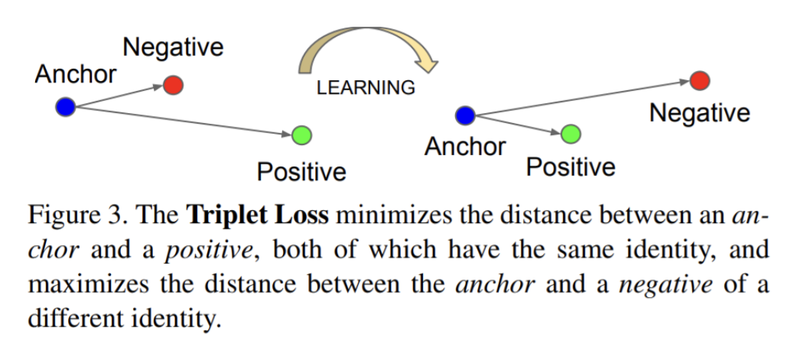        

### <span style="color:red">위에서 사용한 face_recognition에 FaceNet 얼굴 임베딩 모델이 탑재되어 있다.</span>

* ## 3-2. 얼굴 임베딩 벡터 구하는 함수

In [101]:
# 내 사진 폴더에 있는 리스트 출력
file_list = os.listdir(image_path)
print ("사진 리스트: {}".format(file_list))
print(len(file_list))

사진 리스트: ['매드클라운.jpeg', '조정치.jpg', '브래들리 쿠퍼.jpg', '차범근.jpeg', '숀 코네리.jpg', '최무성.jpg', 'RM.jpg', '장동건.jpeg', '개리.jpg', '수호.jpg', '이진호.jpeg', '시우민.jpg', '백윤식.png', '이천수.jpg', '찬열.jpeg', '피어스 브로스넌.jpg', '철면수심.jpg', '기성용.jpg', '정형돈.jpg', '이연걸.jpeg', '로저 무어.jpeg', '트와이스나연.jpg', '잇지예지.jpeg', '박재범.jpg', '비니.jpg', '이말년.png', '권태원.jpeg', '대도서관.jpeg', '슈퍼비.jpeg', '김희철.jpg', '우기.jpg', '민니.jpg', '김광현.jpg', 'biden.jpg', '성시경.jpg', '솔라.jpg', '차두리.jpeg', '존 파브르.jpeg', '박보영.jpg', '류현진.jpg', '여자아이들수진.jpeg', '이광수.jpg', '김현수.jpeg', '돈스파이크.jpg', '장성호.jpeg', '제프리 힌턴.jpg', '차승원.jpg', '수지.jpg', '아이유.jpg', '리사.jpg', '마크 러팔로.jpeg', '길.jpg', '주호민.jpeg', '배성재.jpg', '이동국.jpeg', '레드벨벳웬디.jpg', '권현빈.jpg', '진.jpg', '유노윤호.jpg', '트와이스정연.jpg', '제이크 질렌할.jpeg', '고창석.jpeg', '지드래곤.jpeg', '다니엘 크레이그.jpeg', '조달환.png', '김연우.jpeg', '벤 에플렉.jpeg', '클린트 이스트우드.jpg', '서현진.jpg', '앤드류 응.png', '온앤오프효진.jpg', '김C.jpeg', '이용진.jpg', '공효진.jpg', '최양락.jpg', '제니.jpg', '트와이스사나.jpg', '이민호.jpeg', '이준혁.jpeg', '이경규.jpeg', '오재원.jpg', '박항서.jpg', '윤경신.j

* ### 3-2-1. 이미지 하나에 대한 얼굴 임베딩 벡터 구하는 함수

In [11]:
# 이미지 사진 하나에 대한 임베딩 벡터 구하는 함수

image_file = os.path.join(image_path, file_list[0])
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(embedding) # 내 사진의 임베딩 벡터
print(len(embedding))
print(len(embedding[0])) # 128차원

[array([-8.81047547e-02,  4.58421856e-02,  4.36551273e-02, -2.89858077e-02,
       -4.40566838e-02, -2.08902061e-02, -1.11275703e-01, -8.61583278e-02,
        2.06139907e-01, -8.62383172e-02,  2.12955490e-01, -5.88256046e-02,
       -2.10244328e-01, -4.69414331e-02, -5.88104948e-02,  1.86358377e-01,
       -1.86134309e-01, -5.60187101e-02, -7.34614488e-03, -1.04207182e-02,
        1.15493186e-01,  4.14793231e-02,  4.60102186e-02,  8.21840763e-02,
       -9.18553993e-02, -3.96038830e-01, -1.43726349e-01, -7.37859905e-02,
        2.67613977e-02, -1.03067327e-02, -6.92419559e-02,  2.25147605e-02,
       -1.47926807e-01, -6.94967732e-02,  5.08406982e-02,  1.42187268e-01,
        1.71502703e-04, -1.24968357e-01,  1.94020703e-01, -2.61558872e-03,
       -2.41077170e-01,  5.00592515e-02,  7.60921240e-02,  2.36579493e-01,
        1.89135551e-01,  6.66774511e-02,  3.84571925e-02, -1.59512877e-01,
        1.60332754e-01, -1.96322247e-01,  1.95589960e-02,  1.40096083e-01,
        2.86803991e-02, 

* ### 3-2-2. 폴더 내부에 있는 이미지 전체에 대한 얼굴 임베딩 벡터 구하는 함수

In [12]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        
        if len(embedding) > 0:
          embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [14]:
# 사진 디렉토리 임베딩 벡터 변환

embedding_dict = get_face_embedding_dict(image_path)

print(embedding_dict['img_cw'])
print(embedding_dict['김유정'])

[-0.07047834  0.00163675 -0.0007844  -0.08869483 -0.1351335  -0.05404441
 -0.09714475 -0.08258048  0.10154955 -0.18420166  0.1817864  -0.12212528
 -0.21152742 -0.05784912 -0.06744597  0.20247963 -0.20127955 -0.12116398
 -0.02962872 -0.05559838  0.05431534  0.04355226 -0.01570179  0.03432433
 -0.05816478 -0.37262052 -0.11365145 -0.03959493 -0.04226585 -0.02088954
 -0.05828911  0.11678874 -0.12529813 -0.01110689  0.07276244  0.09513167
 -0.02546687 -0.08337365  0.11651763 -0.01180481 -0.22922951  0.03334438
  0.0918823   0.22726147  0.195621    0.03186095 -0.02411885 -0.11888599
  0.117731   -0.14707737  0.00837364  0.14184681  0.06417241  0.02071729
  0.07421585 -0.08890537  0.02309662  0.14923826 -0.12317306 -0.0498434
  0.06597924 -0.11840911 -0.00159543 -0.14034456  0.23768452  0.08106802
 -0.12071151 -0.19901131  0.14803091 -0.15290828 -0.08481727  0.0493527
 -0.14932445 -0.17693928 -0.25641951  0.03023464  0.30061916  0.12978454
 -0.1269393   0.09741426  0.04820811 -0.0073029   0.1

* ## 3-3. 얼굴 임베딩 사이의 거리 측정

* ### 3-3-1. 내 사진 2장과 연예인 사진 1장
   \- 내 사진1을 기준으로 내 사진2와 연예인 사진1과의 임베딩 거리 비교

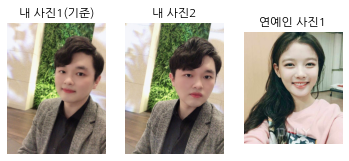

>> 내 사진1을 기준으로 내 사진2와 연예인 사진1과 임베딩 거리 비교


In [21]:
fig = plt.figure()
rows = 1
cols = 3

image_test_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/test'

my_img1_path = os.path.join(image_test_path, 'img_cw4.jpg') # 내 사진1 경로
my_img2_path = os.path.join(image_test_path, 'img_cw3.jpg') # 내 사진2 경로
celebrity_img1_path = os.path.join(image_test_path, '김유정.jpg')

img1 = cv2.imread(my_img1_path)
img2 = cv2.imread(my_img2_path)
img3 = cv2.imread(celebrity_img1_path)

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title('내 사진1(기준)')
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title('내 사진2')
ax2.axis("off")

ax3 = fig.add_subplot(rows, cols, 3)
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.set_title('연예인 사진1')
ax3.axis("off")

plt.show()
print('>> 내 사진1을 기준으로 내 사진2와 연예인 사진1과 임베딩 거리 비교')

* ### 3-3-2. 얼굴 영역 인식 및 임베딩 벡터 추출
   \- Face Detection을 이용

In [22]:
# get_face_embedding함수를 이용해 각 이미지별로 임베딩 벡터 추출

my_img1_embed = get_face_embedding(img1)
my_img2_embed = get_face_embedding(img2)
celebrity_img1_embed = get_face_embedding(img3)

print(my_img1_embed)
print(my_img2_embed)
print(celebrity_img1_embed)

print(type(my_img1_embed)) # 리스트 자료형
print(type(my_img2_embed)) # 리스트 자료형
print(type(my_img2_embed)) # 리스트 자료형

[array([-1.17611289e-01, -7.48180971e-03,  2.08245404e-02, -4.75736819e-02,
       -1.17714450e-01, -6.39295429e-02, -7.62237459e-02, -6.71070218e-02,
        1.37185663e-01, -1.11648254e-01,  2.18283221e-01, -5.73815256e-02,
       -1.99621260e-01, -4.49982882e-02, -6.82935193e-02,  2.16799542e-01,
       -2.05199048e-01, -1.34556770e-01,  8.15297849e-03, -5.75756356e-02,
        5.29189557e-02,  6.36326671e-02, -2.80332845e-02,  5.08417264e-02,
       -1.18872657e-01, -2.84142345e-01, -8.55104551e-02, -5.68249896e-02,
       -1.85435489e-02, -2.82689203e-02, -6.16473146e-02,  1.16896108e-01,
       -1.23390600e-01, -5.65635562e-02,  1.21022992e-01,  1.51120976e-01,
       -1.35008926e-02, -5.76834902e-02,  1.38767153e-01,  1.84747726e-02,
       -2.47856990e-01,  3.77333835e-02,  8.89009610e-02,  2.52736717e-01,
        1.91764593e-01,  3.84951644e-02, -4.73444834e-02, -1.61061868e-01,
        1.36308447e-01, -1.66223064e-01,  3.17879207e-03,  1.51380524e-01,
        8.61497968e-02, 

* ### 3-3-3. list -> array 변경
   \- 넘파이 연산을 위해 리스트에서 배열로 변환

In [23]:
my_img1_array = np.array(my_img1_embed[0])
my_img2_array = np.array(my_img2_embed[0])
celebrity_img1_array = np.array(celebrity_img1_embed[0])

print(type(my_img1_array)) # 넘파이 배열
print(type(my_img2_array)) # 넘파이 배열
print(type(celebrity_img1_array)) # 넘파이 배열

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


* ### 3-3-4. 임베딩 벡터 간의 L2 거리 측정
   \- np.linlag.norm 활용
   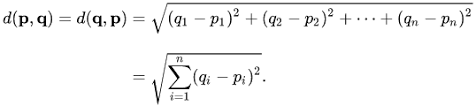

In [24]:
L2_distances = np.linalg.norm([my_img2_array, celebrity_img1_array] - my_img1_array, axis=1, ord=2)
print("내 사진1과 내 사진2과의 거리: {}".format(L2_distances[0])) # 0.30
print("내 사진1과 연예인 사진1과의 거리: {}".format(L2_distances[1])) # 0.44

내 사진1과 내 사진2과의 거리: 0.3098624440063436
내 사진1과 연예인 사진1과의 거리: 0.4496534907867167


> ### <U>내 사진끼리 거리<span style="color:blue">(0.30)</span></U>와 <U>내 사진과 연예인 사진과의 거리<span style="color:red">(0.44)</span></U> 비교시
> ### >> 내 사진1과 내 사진2과의 거리가 더 가깝다!

* ### (참고) L1, L2 거리 비교
   \- L1 거리를 사용하게 되면 정확한 두 임베딩 벡터의 거리가 아니라 근사치가 나올 것(값이 L2에 비해 커진다)

In [25]:
# L1 거리과 L2 거리 비교

L1_distances = np.linalg.norm([my_img2_array, celebrity_img1_array] - my_img1_array, axis=1, ord=1)

print("내 사진1과 연예인 사진1과의 L1 거리: {}".format(L1_distances[1]))
print("내 사진1과 연예인 사진1과의 L2 거리: {}".format(L2_distances[1]))

내 사진1과 연예인 사진1과의 L1 거리: 4.051106290426105
내 사진1과 연예인 사진1과의 L2 거리: 0.4496534907867167


> #### <U>L1 거리<span style="color:red">(4.05)</span></U>와 <U>L2 거리<span style="color:blue">(0.44)</span></U> 비교시
> #### L1 거리가 큰 것을 확인 (전체적인 거리 분포가 커진다.)
> ### >> L2 거리 사용!

* ### 3-3-5. 파일명으로 임베딩 벡터 거리 측정 함수 작성
   \- 이미지 디렉토리 전체 임베딩 벡터 거리(embedding_dict)를 이용

In [27]:
# 두 이미지의 임베딩 벡터 거리 측정 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('img_cw', '김유정')

0.4502066470168041

***

## 4. 얼굴 임베딩 공간의 시각화

* ## 4-1. 차원 축소
  \- PCA: 주성분 분석. 분산(모든 축에 따른 값의 변화도)을 확인한 뒤 변화가 가장 큰 축을 남기는 방법
     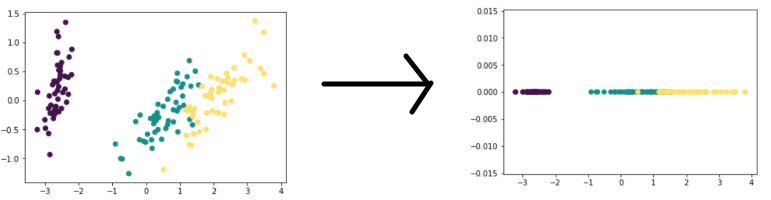
     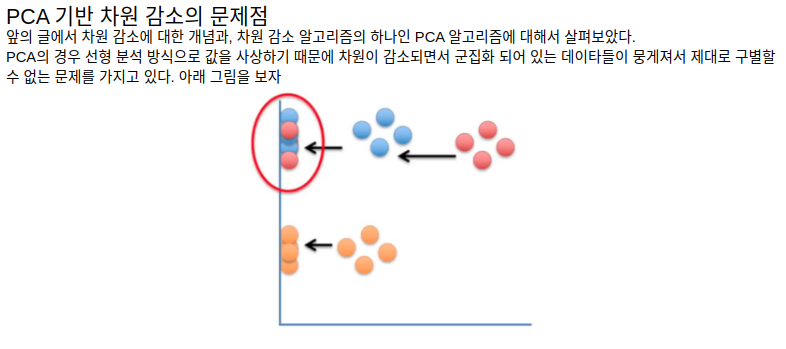
     참고: https://bcho.tistory.com/1209?category=555440
  
  \- T-SNE: 저차원으로 축소해도 고차원 상태의 거리만큼 유지하는 기법. 임의로 목표하는 차원만큼 데이터를 배치한 후 각 데이터들을 고차원 상태의 거리 상태와 비교해 위치를 변경해준다.
     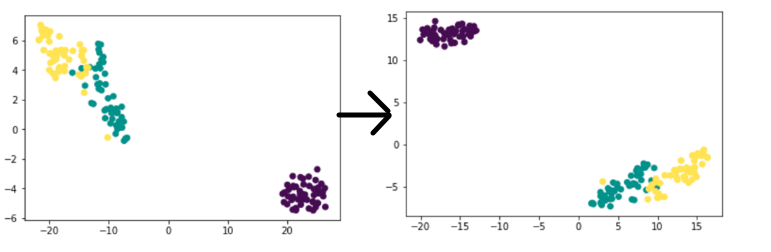
     참고: https://bcho.tistory.com/1210
     
* ### PCA에서는 모든 차원이 잘 반영되지 않는 면이 있지만
### T-SNE는 원래 상태의 거리 상태를 보존하기 때문에 차원이 축소되도 크게 흔들리지 않는다.

## 5. 가장 가까운 얼굴 찾아보기

* ## 5-1. 내 사진 하나를 기준으로 잡고 내 사진과 연예인들 사진과 임베딩 벡터 거리 차이를 기준으로 정렬(가장 거리 차이 작은 순으로 정렬)

In [32]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2) # 두 이미지의 임베딩 벡터 거리 측정
    return get_distance_from_name1 # name1과 name2 이미지의 임베딩 벡터 거리 차이 반환

sort_key_func = get_sort_key_func('img_cw')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('김유정') 라고 호출할 때 img_cw1와 김유정 사이의 임베딩 벡터 거리를 계산합니다.
sort_key_func('김유정') # img_cw(내 사진)과 김유정 사진과의 임베딩 벡터 거리 차이 확인

0.4502066470168041

In [29]:
# 위에서 정의한 sort_key_func를 활용해 내 사진과 연예인들 사진들의 임베딩 벡터 거리 차이를 기준으로 정렬한다.

sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('img_cw',
  array([-0.07047834,  0.00163675, -0.0007844 , -0.08869483, -0.1351335 ,
         -0.05404441, -0.09714475, -0.08258048,  0.10154955, -0.18420166,
          0.1817864 , -0.12212528, -0.21152742, -0.05784912, -0.06744597,
          0.20247963, -0.20127955, -0.12116398, -0.02962872, -0.05559838,
          0.05431534,  0.04355226, -0.01570179,  0.03432433, -0.05816478,
         -0.37262052, -0.11365145, -0.03959493, -0.04226585, -0.02088954,
         -0.05828911,  0.11678874, -0.12529813, -0.01110689,  0.07276244,
          0.09513167, -0.02546687, -0.08337365,  0.11651763, -0.01180481,
         -0.22922951,  0.03334438,  0.0918823 ,  0.22726147,  0.195621  ,
          0.03186095, -0.02411885, -0.11888599,  0.117731  , -0.14707737,
          0.00837364,  0.14184681,  0.06417241,  0.02071729,  0.07421585,
         -0.08890537,  0.02309662,  0.14923826, -0.12317306, -0.0498434 ,
          0.06597924, -0.11840911, -0.00159543, -0.14034456,  0.23768452,
          0.08106802, -0.1

* ## 5-2. 입력한 사진과 가장 비슷한 사람 출력하는 함수

In [36]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [37]:
# 나 가장 닮은 사람은 누굴까요?
get_nearest_face('img_cw')

순위 1 : 이름(강민경), 거리(0.35228731301465777)
순위 2 : 이름(디오), 거리(0.4162682182506765)
순위 3 : 이름(트와이스사나), 거리(0.4204810608088844)
순위 4 : 이름(지호), 거리(0.42839505021627583)
순위 5 : 이름(박나래), 거리(0.42915279479264856)


***

## 6. 시각화 해보기

* ### 닮은꼴 연예인 1등부터 5등까지 시각화 (얼굴 부분만 확인해보기)

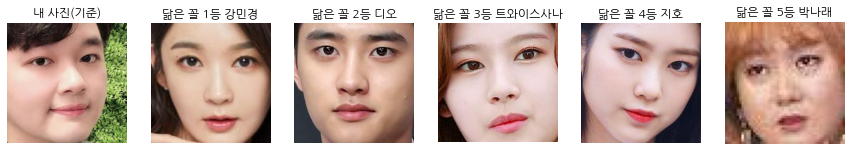

In [100]:
def get_nearest_face_plot(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    nearest_face_list = []
    
    for i in range(top+1):
        if sorted_faces[i]:
            nearest_face_list.append(sorted_faces[i][0])
    
    image_path = os.getenv('HOME')+'/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/image'
    path_list = []
    for i in nearest_face_list:
        for j in file_list:
            if j.split('.')[0] == i:
                path_list.append(os.path.join(image_path, j))
    
    def get_gropped_face(image_path):
        image = face_recognition.load_image_file(image_path)
        face_locations = face_recognition.face_locations(image)
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
    
        return cropped_face
    
    cropped_path = '/home/aiffel-dj40/1.AIFFEL_Study/Exploration/E07_Face_Recognition/data/cropped'
    cropped_file_list = []
    for i in path_list:
        face = get_gropped_face(i)
        pillow_image = Image.fromarray(face)
        image_cropped = os.path.join(cropped_path, i.split('/')[-1].split('.')[0] + '_cropped.jpg')
        cropped_file_list.append(image_cropped)
        pillow_image.save(image_cropped)

    fig = plt.figure(figsize=(15, 6))
    rows = 1
    cols = top + 1
    
    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[0]), cv2.COLOR_BGR2RGB))
    ax1.set_title('내 사진(기준)')
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[1]), cv2.COLOR_BGR2RGB))
    ax2.set_title('닮은 꼴 1등 ' + sorted_faces[1][0])
    ax2.axis("off")

    ax3 = fig.add_subplot(rows, cols, 3)
    ax3.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[2]), cv2.COLOR_BGR2RGB))
    ax3.set_title('닮은 꼴 2등 ' + sorted_faces[2][0])
    ax3.axis("off")
    
    ax4 = fig.add_subplot(rows, cols, 4)
    ax4.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[3]), cv2.COLOR_BGR2RGB))
    ax4.set_title('닮은 꼴 3등 ' + sorted_faces[3][0])
    ax4.axis("off")

    ax5 = fig.add_subplot(rows, cols, 5)
    ax5.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[4]), cv2.COLOR_BGR2RGB))
    ax5.set_title('닮은 꼴 4등 ' + sorted_faces[4][0])
    ax5.axis("off")
    
    ax6 = fig.add_subplot(rows, cols, 6)
    ax6.imshow(cv2.cvtColor(cv2.imread(cropped_file_list[5]), cv2.COLOR_BGR2RGB))
    ax6.set_title('닮은 꼴 5등 ' + sorted_faces[5][0])
    ax6.axis("off")
    

    plt.show()

get_nearest_face_plot('img_cw')

## 7. 루브릭 평가 및 회고

* ## 7-1. 루브릭 평가
  **1) 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.**
     
     \- 5-2에서 얼굴 임베딩 벡터 비교를 통해 가장 닮은 연예인 5명을 구함 (강민경, 디오, 트와이스사나, 지호, 박나래)
     
  **2) 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.**
     
     \- 274장의 연예인 이미지를 이용해 시도함
     
  **3) 다양하고 재미있는 결과 시각화를 시도하였다.**
    
     \- 6번에서 matplotlib와 Pillow를 이용해 얼굴 영역만 잘라서 저장 후 시각화를 시도함

* ## 7-2. 회고
  > 1) 이미지에 대한 Exploration은 몇 번 경험해서 익숙하다고 생각했는데 새로운 개념(임베딩 벡터, 얼굴 영역 인식)을 배우고 학습했다.
  > - 3-1을 진행하면서 임베딩, 얼굴 임베딩 벡터, FaceNet, Triplet Loss, L2 정규화
  > - 3-4에서 L2와 L1 거리 차이
  > - 4-1에서 차원 축소와 방법 2가지(PCA. T-SNE)
  
  > 2) 임베딩 벡터 구하는 함수 작성 중 생긴 오류
  > - 이 부분은 slack를 통해 빠르게 문제를 공유해주신 덕분에 금방 해결했다. 원인: 얼굴인식이 되지 않아 리스트 길이가 0이었기 때문
  > - if문과 continue를 통해 해결
  
  > 3) matplotilb에 제목에서 한글이 깨지는 현상
  > - 해결: 폰트를 전역으로 한글 폰트로 설정함 (참고한 블로그: https://seonghyuk.tistory.com/31)
  
  > 4) 얼굴 임베딩 벡터 거리 비교 결과
  > - 1등부터 5등까지 4명이 여성.
  > - 아무래도 기준 사진(내 사진)이 조금 뽀얗게 나와서 그런듯하다. 아니면 정말 닮았나...? 이런 결과는 다함께 나눠도 좋을 것 같다.
  > - 힘든 노드를 진행하다가 꽤 재밌는 결과가 나와 잠시 숨을 돌릴 수 있었다.
  > - 얼굴 임베딩 벡터 거리 측정 기법을 이용해 얼마나 닮았는지 백분율로 나타내도 재밌을 듯 하다.